# 4.7 Deriving New Variables

### Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing data sets

In [2]:
# Creating path variable
path = r'C:\Users\lisa_\02\2023 Instacart Basket Analysis'

In [3]:
#Importing order_products_merged.pkl
ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

## 4.7.1 Create the “price_label” and “busiest_day” columns.

In [4]:
# Creating conditions with loc() function to create price_label column
ords_prods_merged.loc[ords_prods_merged['prices'] > 15, 'price_label'] = 'High-range product'
ords_prods_merged.loc[(ords_prods_merged['prices'] <= 15) & (ords_prods_merged['prices'] > 5), 'price_label'] = 'Mid-range product' 
ords_prods_merged.loc[ords_prods_merged['prices'] <= 5, 'price_label'] = 'Low-range product'

In [5]:
# Check frequency
ords_prods_merged['price_label'].value_counts(dropna = False)

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_label, dtype: int64

<AxesSubplot: >

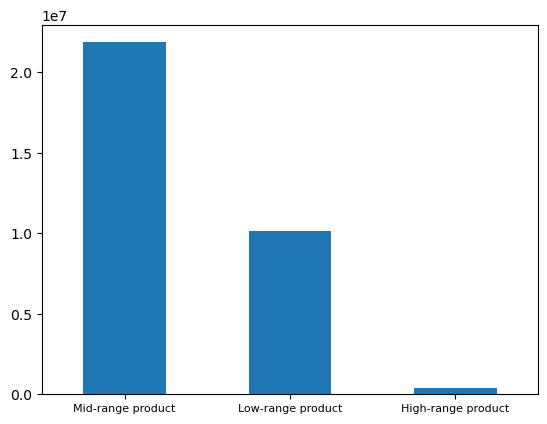

In [6]:
# Creating bar graph
price_range_bar = ords_prods_merged['price_label'].value_counts().plot.bar()
plt.xticks(rotation=0, fontsize = 8)
price_range_bar

In [7]:
# Check frequency
ords_prods_merged['orders_day_of_week'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [8]:
# Creating loop to compare busiest and slowest days
result = []

for value in ords_prods_merged["orders_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [9]:
# Check output
result

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Reg

In [10]:
# Creating busiest_day column
ords_prods_merged['busiest_day'] = result

In [11]:
# Check frequency
ords_prods_merged['busiest_day'].value_counts(dropna = False)

Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: busiest_day, dtype: int64

In [12]:
# Check output
ords_prods_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,med_days,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


## 4.7.2 Suppose your clients have changed their minds about the labels you created in your “busiest_day” column. Now, they want “Busiest day” to become “Busiest days” (plural). This label should correspond with the two busiest days of the week as opposed to the single busiest day. At the same time, they’d also like to know the two slowest days. Create a new column for this using a suitable method.

In [13]:
# Check frequency
ords_prods_merged['orders_day_of_week'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [14]:
# Creating loop to compare busiest and slowest days
days = []

for day in ords_prods_merged["orders_day_of_week"]:
  if day == 0 or day == 1:
    days.append("Busiest days")
  elif day == 4 or day == 3:
    days.append("Slowest days")
  else:
    days.append("Regularly busy")

In [15]:
# Creating busiest_days column
ords_prods_merged['busiest_days'] = days

## 4.7.3 Check the values of this new column for accuracy. Note any observations in markdown format.

In [16]:
# Check frequency
ords_prods_merged['busiest_days'].value_counts(dropna = False)

Regularly busy    12916111
Busiest days      11864412
Slowest days       7624336
Name: busiest_days, dtype: int64

In [17]:
# Check output
ords_prods_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,med_days,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


## 4.7.4 When too many users make Instacart orders at the same time, the app freezes. The senior technical officer at Instacart wants you to identify the busiest hours of the day. Rather than by hour, they want periods of time labeled “Most orders,” “Average orders,” and “Fewest orders.” Create a new column containing these labels called “busiest_period_of_day.”

In [18]:
# Check frequency
ords_prods_merged['order_hour_of_day'].value_counts(dropna = False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

In [19]:
# Creating loop to compare busiest and slowest hours of the day
hours = []

for hour in ords_prods_merged['order_hour_of_day']:
  if hour in [10, 11, 14, 15, 13, 12, 16, 9]:
    hours.append('Most orders')
  elif hour in [23, 6, 0, 1, 5, 2, 4, 3]:
    hours.append('Fewest orders')
  else:
    hours.append('Average orders')

In [20]:
# create busiest_period_of_day column
ords_prods_merged['busiest_period_of_day'] = hours

In [21]:
# Check frequency
ords_prods_merged['busiest_period_of_day'].value_counts(dropna = False)

Most orders       21118071
Average orders     9997651
Fewest orders      1289137
Name: busiest_period_of_day, dtype: int64

In [22]:
# Check output
ords_prods_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,med_days,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


## 4.7.7 Export your dataframe as a pickle file (since you added new columns) and store it correctly in your “Prepared Data” folder.

In [23]:
# Export ords_prods_merge to pkl
ords_prods_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged.pkl'))

In [24]:
# Exporting to .png files
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_bar.png'))